In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [4]:
!pwd

/content


# 새 섹션

In [2]:
cd /content/MyDrive/MyDrive/project

/content/MyDrive/MyDrive/project


In [ ]:
!pwd

/content/MyDrive/MyDrive/project


In [ ]:
!ls -al

total 5277036
-rw------- 1 root root     190550 Dec  8 23:12  1208.ipynb
-rw------- 1 root root      40701 Dec  8 22:21 'alexnet (1).ipynb'
-rw------- 1 root root     296594 Dec  8 07:33  AlexNet2.ipynb
-rw------- 1 root root      40701 Dec  8 05:45  alexnet.ipynb
-rw------- 1 root root     194650 Dec  8 07:20  ILSVRC2010_ground_truth.txt
-rw------- 1 root root 5397002240 Dec  5 09:46  ILSVRC2010_images_.tar
drwx------ 2 root root       4096 Dec  8 23:09  ImageNet
-rw------- 1 root root    2509433 Dec  8 22:21 'imagenet_이미지확인 (1).ipynb'
-rw------- 1 root root    2501721 Dec  8 09:40  imagenet_이미지확인.ipynb
-rw------- 1 root root     900877 Dec  8 22:21  lastproject.ipynb


In [ ]:
!wget /content/MyDrive/MyDrive/project/ILSVRC2010_images_.tar

/content/MyDrive/MyDrive/project/ILSVRC2010_images_.tar: Scheme missing.


In [ ]:
!tar -xzvf /content/MyDrive/MyDrive/project/ILSVRC2010_images_.tar



gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [6]:
!pwd

/content/MyDrive/MyDrive/project


In [3]:
import os
os.chdir('/content/MyDrive/MyDrive/project')

In [ ]:
!tar -xvf /content/MyDrive/MyDrive/project/ILSVRC2010_images_.tar

In [4]:
# 라이브러리 불러오기
import torch # ptyotch
import numpy as np # numpy
import matplotlib.pyplot as plt # matplotlib
import pandas as pd # pandas
import natsort
import cv2

In [12]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [13]:
import os
os.chdir('/content/MyDrive/MyDrive/project')

In [14]:
# 결과변수 불러오기
y = pd.read_csv('ILSVRC2010_ground_truth.txt', header=None, names=['answer'])
y

,answer
0,78
1,854
2,435
3,541
4,973
...,...
49995,467
49996,646
49997,68
49998,93


In [16]:
# 경로불러오기
image_path = '/content/MyDrive/MyDrive/project/val/'

img_list = natsort.natsorted(os.listdir(image_path))
img_list_jpeg = [img for img in img_list if img.endswith(".JPEG")]

print("img_list_jpeg: {}".format(img_list_jpeg))

img_list_jpeg: ['ILSVRC2010_val_00000001.JPEG', 'ILSVRC2010_val_00000002.JPEG', 'ILSVRC2010_val_00000003.JPEG', 'ILSVRC2010_val_00000004.JPEG', 'ILSVRC2010_val_00000005.JPEG', 'ILSVRC2010_val_00000006.JPEG', 'ILSVRC2010_val_00000007.JPEG', 'ILSVRC2010_val_00000008.JPEG', 'ILSVRC2010_val_00000009.JPEG', 'ILSVRC2010_val_00000010.JPEG', 'ILSVRC2010_val_00000011.JPEG', 'ILSVRC2010_val_00000012.JPEG', 'ILSVRC2010_val_00000013.JPEG', 'ILSVRC2010_val_00000014.JPEG', 'ILSVRC2010_val_00000015.JPEG', 'ILSVRC2010_val_00000016.JPEG', 'ILSVRC2010_val_00000017.JPEG', 'ILSVRC2010_val_00000018.JPEG', 'ILSVRC2010_val_00000019.JPEG', 'ILSVRC2010_val_00000020.JPEG', 'ILSVRC2010_val_00000021.JPEG', 'ILSVRC2010_val_00000022.JPEG', 'ILSVRC2010_val_00000023.JPEG', 'ILSVRC2010_val_00000024.JPEG', 'ILSVRC2010_val_00000025.JPEG', 'ILSVRC2010_val_00000026.JPEG', 'ILSVRC2010_val_00000027.JPEG', 'ILSVRC2010_val_00000028.JPEG', 'ILSVRC2010_val_00000029.JPEG', 'ILSVRC2010_val_00000030.JPEG', 'ILSVRC2010_val_00000031

# 클래스가 201인 데이터 불러오기
index = list(y[y['answer']==201].index)
img_list_open = [img_list_jpeg[i] for i in index]

In [22]:
index = list(y[y['answer']==78].index)


In [28]:
img_list_open = [img_list_jpeg[i] for i in index]

IndexError: ignored

201


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-8bad8349ddf3>", line 12, in <module>
    plt.subplot(5, 5, img_list_open.index(i)+1)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py", line 1030, in subplot
    a = fig.add_subplot(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/figure.py", line 1419, in add_subplot
    a = subplot_class_factory(projection_class)(self, *args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_subplots.py", line 65, in __init__
    raise ValueError(
ValueError: num must be 1 <= num <= 25, not 26

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = va

ValueError: ignored

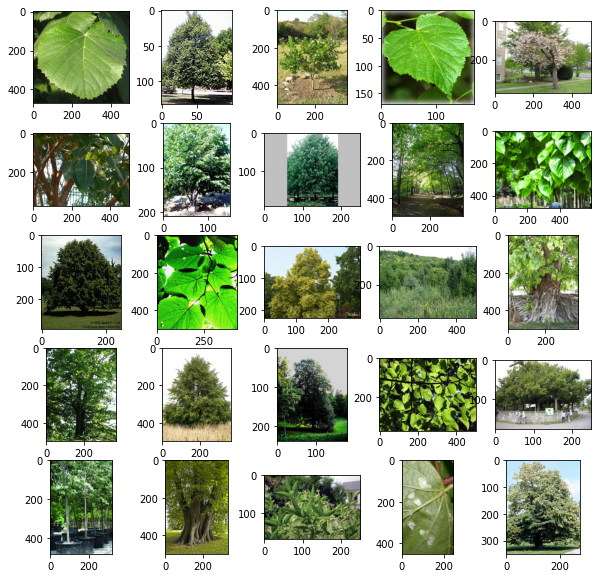

In [ ]:
# 이미지 그리기
print('201')
plt.figure(figsize=(10, 10))

for i in img_list_open:
  path = image_path + i

  img = cv2.imread(path)

  img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(5, 5, img_list_open.index(i)+1)
  plt.imshow(img_color)

plt.show()
